# 01. 차원축소
---
* 날짜:
* 이름:

```
import numpy as np
import matplotlib.pyplot as plt
```

In [4]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("ggplot")

## **개념정리**






---
### **샘플 공간**
---

#### **1차원**



||국어(x)|
|--|--|
|**sample 1**| 100|
|**sample 2**| 45|
|**sample 3**| 60|
|**sample 4**| 85|

* 전체 데이터셋 $D$의 shape?

In [ ]:
D1=np.array([100,45,60,85]).reshape(4,1)
print(D1,D1.shape)

[[100]
 [ 45]
 [ 60]
 [ 85]] (4, 1)


* 샘플 한개 $x_i$ 의 shape?

In [ ]:
for xi in D1:
  print(xi,xi.shape)

[100] (1,)
[45] (1,)
[60] (1,)
[85] (1,)


* $x_i$ 샘플 공간의 차원은?

In [ ]:
len(xi)

1

* 샘플공간 시각화

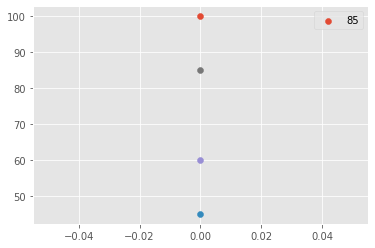

In [ ]:
for xi in D1:
  plt.scatter(0, xi, label=xi)
  plt.legend(xi)
plt.show()

#### **2차원**


||국어(x)|수학(y)|
|--|--|--|
|**sample 1**| 100| 90 | 
|**sample 2**| 45| 50 | 
|**sample 3**| 60| 70 |
|**sample 4**| 85| 80 | 

In [ ]:
D2=np.array([[100,45,60,85],[90,50,70,80]]).swapaxes(0,1)
print(D2,D2.shape)

[[100  90]
 [ 45  50]
 [ 60  70]
 [ 85  80]] (4, 2)


* 샘플 한개 $x_i$ 의 shape?

In [ ]:
for xi in D2:
  print(xi,xi.shape)

[100  90] (2,)
[45 50] (2,)
[60 70] (2,)
[85 80] (2,)


* $x_i$ 샘플 공간의 차원은?

In [ ]:
len(xi)

2

* 샘플공간 시각화

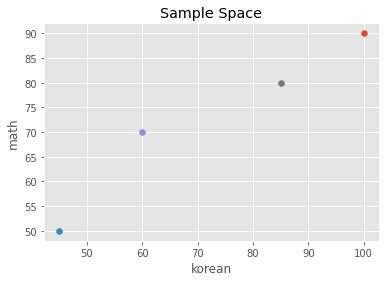

In [ ]:
for xi in D2:
  plt.scatter(xi[0], xi[1])
plt.title("Sample Space")
plt.xlabel("korean")
plt.ylabel("math")
plt.show()

#### **3차원**
||국어|수학|영어|
|--|--|--|--|
|**sample 1**| 100| 90 | 90 |
|**sample 2**| 45| 50 | 60 |
|**sample 3**| 60| 70 | 65 |
|**sample 4**| 85| 80 | 90 |

In [ ]:
D3 = np.array([[100,45,60,85],[90,50,70,80],[90,60,65,90]]).swapaxes(0,1)

* 샘플 한개 $x_i$ 의 shape?

In [ ]:
for xi in D3:
  print(xi,xi.shape)

[100  90  90] (3,)
[45 50 60] (3,)
[60 70 65] (3,)
[85 80 90] (3,)


* $x_i$ 샘플 공간의 차원은?

In [ ]:
len(xi)

3

* 샘플공간 시각화

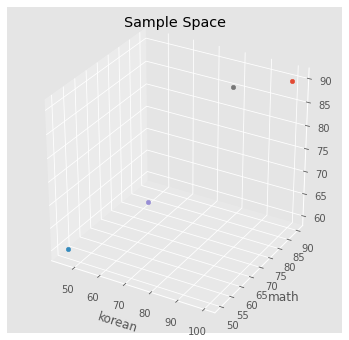

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
Axes3D

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111,projection = '3d')
for xi in D3:
  x= xi[0]
  y= xi[1]
  z= xi[2]
  ax.scatter(x,y,z)
plt.title("Sample Space")
plt.xlabel("korean")
plt.ylabel("math")
plt.show()

---
### **차원 축소**
---


#### **모델**

![](https://github.com/yebiny/Lecture-Python-MachinLearning/blob/main/imgs/02-1.png?raw=true)


인풋 행렬 $X$ 에 대해 행렬 $W=(w_1, w_2)$를 곱한후 반환하는 모델을 만들어 봅시다

In [ ]:
def reduction_model(X,w1=0,w2=0):
  W=np.array([[w1],[w2]])
  Z = np.matmul(X,W)
  return Z

#### **$W = (0,1)$**

* 데이터 변환

In [ ]:
Z = reduction_model(D2,0,1)
print(Z,Z.shape)
print(D2,D2.shape)

[[90]
 [50]
 [70]
 [80]] (4, 1)
[[100  90]
 [ 45  50]
 [ 60  70]
 [ 85  80]] (4, 2)


* 샘플공간(Z) 시각화

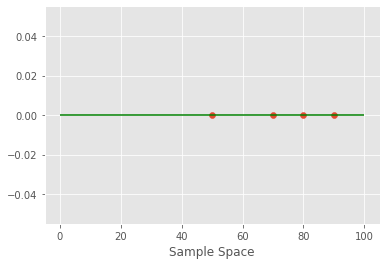

In [ ]:
plt.hlines(0,xmin=0,xmax=100,color='g')
plt.xlabel("Sample Space")
plt.scatter(Z,[0,0,0,0])
plt.show()

#### **$W = (1,0)$**

* 차원축소

In [ ]:
Z2 = reduction_model(D2,1,0)
print(Z2,Z2.shape)
print(D2,D2.shape)

[[100]
 [ 45]
 [ 60]
 [ 85]] (4, 1)
[[100  90]
 [ 45  50]
 [ 60  70]
 [ 85  80]] (4, 2)


* 샘플공간 시각화

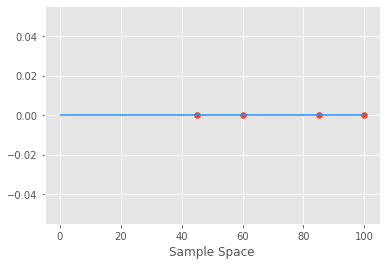

In [ ]:
plt.hlines(0,xmin=0,xmax=100,color='dodgerblue')
plt.xlabel("Sample Space")
plt.scatter(Z2,[0,0,0,0])
plt.show()

#### **$W = (1,1)$**

* 차원축소

In [ ]:
Z3 = reduction_model(D2,1,0)
print(Z3,Z3.shape)
print(D2,D2.shape)

[[100]
 [ 45]
 [ 60]
 [ 85]] (4, 1)
[[100  90]
 [ 45  50]
 [ 60  70]
 [ 85  80]] (4, 2)


* 샘플공간 시각화

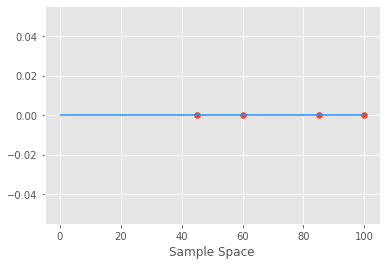

In [ ]:
plt.hlines(0,xmin=0,xmax=100,color='dodgerblue')
plt.xlabel("Sample Space")
plt.scatter(Z3,[0,0,0,0])
plt.show()

---
### **투영(Projection)**
---

* 시각화

---
## **실습**
---


### **매니폴드 학습**

`sklearn` 라이브러리를 을 이용해 매니폴드 학습을 진행해봅니다.

```
from sklearn import manifold, datasets
from mpl_toolkits.mplot3d import Axes3D
Axes3D
```

In [1]:
from sklearn import manifold, datasets
from mpl_toolkits.mplot3d import Axes3D
Axes3D

mpl_toolkits.mplot3d.axes3d.Axes3D

#### **Data**

* 데이터 불러오기

In [2]:
X,Y =datasets.make_swiss_roll(n_samples=2000)
print(X[0],X.shape)
print(Y[0],Y.shape)

[ 0.83084739 14.98707209 14.05357726] (2000, 3)
14.078115681870598 (2000,)


* 데이터 시각화

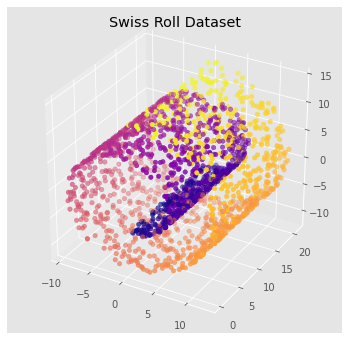

In [5]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111,projection="3d")
x= X[:,0]
y= X[:,1]
z= X[:,2]
ax.scatter(x,y,z, c=Y,cmap='plasma')
plt.title("Swiss Roll Dataset")
plt.show()

#### **알고리즘: Locally Linear Embedding (LLE)**

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.locally_linear_embedding.html?highlight=lle

* 알고리즘 소개
  * 비지도 학습에 해당하며 차원축소 기법 중 투영이 아닌 매니폴드 학습
  * 입력 데이터셋을 낮은 차원의 좌표계로 매핑하는 알고리즘


* manifold 학습

In [6]:
Z, error = manifold.locally_linear_embedding(X, n_neighbors=12,n_components=2)
print(Z.shape)

(2000, 2)


* 결과 시각화

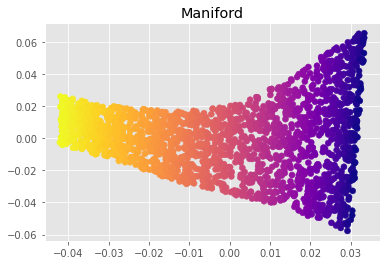

In [7]:
x = Z[:,0]
y = Z[:,1]
plt.scatter(x,y, c=Y,cmap='plasma')
plt.title("Maniford")
plt.show()

## **과제**

---
### **과제 01**
---
1. 스위스롤 데이터에 다양한 `manifold` 알고리즘을 사용하고 시각화 하세요
2. 각 알고리즘에 대해 간략하게 정보를 정리하세요

#### **Multi-Dimensional Scaling (MDS)**

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html#sklearn.manifold.MDS

* 알고리즘 사용 및 시각화

[-9.47176818 10.21096627 -1.31834656] (500, 3)
9.563076396219905 (500,)


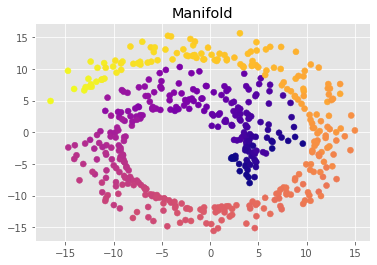

In [8]:
from sklearn import manifold, datasets
from mpl_toolkits.mplot3d import Axes3D
Axes3D

X, Y = datasets.make_swiss_roll(n_samples=500)
print(X[0], X.shape)
print(Y[0], Y.shape)

mds = manifold.MDS(n_components=2)
Z = mds.fit_transform(X)

x = Z[:,0]
y = Z[:,1]
plt.scatter(x, y, c=Y, cmap='plasma')
plt.title("Manifold")
plt.show()

* **알고리즘 소개**
  * .
  * .

#### **t-Stochastic Neighbor Embedding (t-SNE)**

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html?highlight=tsne#sklearn.manifold.TSNE

* 알고리즘 사용 및 시각화

* **알고리즘 소개**
  * .
  * .

#### **ISOMAP**

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html?highlight=isomap#sklearn.manifold.Isomap

* 알고리즘 사용 및 시각화

* **알고리즘 소개**
  * .
  * .

---
### **과제 02**
---

스위스롤 데이터가 아닌 S커브 데이터 `make_s_curve()`를 이용해 `manifold`를 수행 해 보세요

---
### **과제 03**
---

다음 데이터셋 중 하나를 선택해 불러옵니다.
* 펭귄 데이터
* 와인 데이터
* 축구 예측 데이터

간단한 전처리 후 LLE를 이용해 2차원으로 차원축소하고 시각화 하세요. LLE를 사용하기 위해서는 데이터프레임 형식을 넘파이 배열로 바꿔줘야 하는 것에 주의하세요

* 데이터 로드

* X는 종("species") 속성을 제외합니다.

* 섬(island) 속성을 0, 1, 2로 변경

* 섬별(sex) 속성을 0, 1로 변경

* 결측값 확인

* 수치형 자료들의 결측값은 평균으로 대체

* 성별 결측치는 임의로 0로 대체(그냥 샘플 하나를 제거해도 괜찮습니다.)